# Heap Sort

***

## Lists in Python

***

In [1]:
# Lists in Python can be created with square bracket notation.
L = [1, 2, 3, "Hello, world!", None, True]

In [2]:
# They are zero indexed, as usual.
L[5]

True

In [3]:
# Create Lists with the list() function.
list({1, 2, 3, 3})

[1, 2, 3]

In [4]:
# Using negative indexes.
L[-1]

True

In [5]:
# Third last element.
L[-3]

'Hello, world!'

In [6]:
# In-built functions for creating iterables.
list(range(0, 20, 2))

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [7]:
# In-built functions for creating iterables.
L = list(range(20))
L

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [8]:
# List slicing.
L[1:10:2]

[1, 3, 5, 7, 9]

In [9]:
# List slicing.
L[5:10]

[5, 6, 7, 8, 9]

In [10]:
# List slicing.
L[5:]

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [11]:
# List slicing.
L[:5]

[0, 1, 2, 3, 4]

In [12]:
# Quick way to cycle the list to the left.
i = 5
L[i:] + L[:i]

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0, 1, 2, 3, 4]

In [13]:
# Tuples -- immutable.
T = (1, 2, 3, 4)

In [14]:
# Select elements.
T[0]

1

In [15]:
# Slice.
T[3:]

(4,)

In [16]:
# Can't assign - would give an error
# T[2] = 100

In [17]:
# Tuples are created with commas, as opposed to round brackets.
T = 1, 2, 3, 4
T 

(1, 2, 3, 4)

In [18]:
# You can use tuples for assignment.
a, b = 3, 4

In [19]:
a

3

In [20]:
b

4

In [21]:
# Nice trick for swapping two values.
a, b = b, a

In [22]:
a

4

In [23]:
b

3

In [24]:
# List of integers.
L = list(range(10))
L

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [25]:
# List comprehension.
[i**3 for i in L if i % 2 == 0]

[0, 8, 64, 216, 512]

In [26]:
# Curve ball.
L[::-1]

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

<br>

## Bubble Sort

***

In [27]:
# Import a module from the standard library.
import random

In [28]:
# Create a list of integers.
L = list(range(1, 11))
L

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [29]:
# Shuffle the list.
random.shuffle(L)

In [30]:
# The list is shuffled.
L

[8, 1, 2, 4, 9, 6, 3, 7, 5, 10]

In [31]:
# Bubble sort.

# Keep track of number of comparisons.
no_comparisons = 0

# Bubble every (biggest) element up.
for j in range(len(L) - 1):
    # Keep track of any swaps.
    swapped = False
    # Compare all elements that are side by side.
    for i in range(len(L) - 1):
        # Compare the ith element with the (i+1)th.
        if L[i] > L[i+1]:
            # Swap the elements.
            L[i], L[i+1] = L[i+1], L[i]
            # Keep track of the swap.
            swapped = True
        # Add a comparison.
        no_comparisons = no_comparisons + 1
    # Quit if we didn't make any swaps.
    if not swapped:
        break

In [32]:
L

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [33]:
no_comparisons

45

In [34]:
# Bubble sort as a function.

def bubble_sort(L):
    # Keep track of number of comparisons.
    no_comparisons = 0

    # Bubble every (biggest) element up.
    for j in range(len(L) - 1):
        # Keep track of any swaps.
        swapped = False
        # Compare all elements that are side by side.
        for i in range(len(L) - 1 - j):
            # Compare the ith element with the (i+1)th.
            if L[i] > L[i+1]:
                # Swap the elements.
                L[i], L[i+1] = L[i+1], L[i]
                # Keep track of the swap.
                swapped = True
            # Add a comparison.
            no_comparisons = no_comparisons + 1
        # Quit if we didn't make any swaps.
        if not swapped:
            break
    # Return the number of comparisons made.
    return no_comparisons

In [35]:
# Create a list.
L = list(range(1, 11))

# Shuffle it.
random.shuffle(L)

# Look at it.
L

[6, 4, 5, 8, 2, 3, 1, 10, 9, 7]

In [36]:
# The function works on L in place.
bubble_sort(L)

42

In [37]:
L

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [38]:
# Once the list is sorted - bubble sort is O(n)
bubble_sort(L)

9

In [39]:
# The worst case for bubble sort.
L[::-1]

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [40]:
# This is still O(n^2).
bubble_sort(L[::-1])

45

<br>

## Heap Sort

***

### Transplanted from Wikipedia

https://en.m.wikipedia.org/wiki/Heapsort

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Max-Heap.svg/330px-Max-Heap.svg.png" width="300px"></img>

In [41]:
def siftDown(L, parent, end):
    """L[:end+1] should almost be a max heap.
    siftDown repairs it so that it is one."""
    
    # Keep track of the number of comparisons.
    no_comparisons = 0
    
    # While parent is actually a parent (has at least a left child).
    while 2*parent + 1 <= end:
        # The indeces of the children of parent.
        lchild = 2 * parent + 1
        rchild = 2 * parent + 2
        
        # Assume the parent is larger than the children.
        swap = parent
        
        # Is the parent smaller than the left child?
        if L[swap] < L[lchild]:
            # Then swap is set to index of left child.
            swap = lchild
            # Increment no_comparisons.
            no_comparisons = no_comparisons + 1
        # Check if right child exists and is smaller than L[swap].
        if rchild <= end and L[swap] < L[rchild]:
            # Then swap is set to index of right child.
            swap = rchild
            # Increment no_comparisons.
            no_comparisons = no_comparisons + 1
        # We have a max heap if the parent is bigger than the children.
        if swap == parent:
            break
        else:
            # Swap the parent with the bigger child.
            L[parent], L[swap] = L[swap], L[parent]
            # Set parent to bigger child index.
            parent = swap
    # Return the number of comparisons.
    return no_comparisons

In [42]:
def heapsort(L):
    """Sorts the list L in-place using Heap Sort."""
    
    # Keep track of the number of comparisons.
    no_comparisons = 0
    
    # Turn L into a max heap.
    # Index of the last element.
    last_element = len(L) - 1
    # Find the last parent.
    last_parent = (last_element - 1) // 2 #math.floor((count - 2) // 2) #((count - (count % 2)) / 2) - 1 #iParent(count - 1)
    # Loop backwards through all parents.
    for parent in range(last_parent, -1, -1):
        # Sift down.
        no_comparisons = no_comparisons + siftDown(L, parent, last_element)
        
    # Segregate the list L into two parts:
    #   1. L[:end] is a max heap 
    #   2. Each element beyond end is greater than everything before it.    
    # While there are still elements in the heap.
    for end in range(last_element, 0, -1):
        # Move the element at index 0 with the element at index end.
        L[0], L[end] = L[end], L[0]
         # Fix the heap - the root is currently out of place.
        no_comparisons = no_comparisons + siftDown(L, 0, end - 1)
    
    # Return the number of comparisons
    return no_comparisons

In [43]:
# The exmaple list from the diagram above.
L = [19,100,36,25,3,17,7,1,2]
L

[19, 100, 36, 25, 3, 17, 7, 1, 2]

In [44]:
# Show heap sort working.
heapsort(L)
L

[1, 2, 3, 7, 17, 19, 25, 36, 100]

<br>

## Comparing Algorithms

***

In [45]:
# The exmaple list from the diagram above.
L = [19,100,36,25,3,17,7,1,2]
L

[19, 100, 36, 25, 3, 17, 7, 1, 2]

In [46]:
# Perform heap sort, show number of comparisons.
no_comparisons = heapsort(L)
L, no_comparisons

([1, 2, 3, 7, 17, 19, 25, 36, 100], 12)

In [47]:
# Perform bubble sort, show number of comparisons.
L = [19,100,36,25,3,17,7,1,2]
no_comparisons = bubble_sort(L)
L, no_comparisons

([1, 2, 3, 7, 17, 19, 25, 36, 100], 36)

In [48]:
# A module full of combinatorial functions.
import itertools

# Length of example list.
n = 5

# Loop through all permutations of the list of intehers from 0 to n.
for perm in itertools.permutations(range(n)):
    L = list(perm)
    bubb_comp = bubble_sort(L)
    L = list(perm)
    heap_comp = heapsort(L)
    print(f'{str(perm)[1:-1]}|{bubb_comp}|{heap_comp}') #print(perm, '->', L)

0, 1, 2, 3, 4|4|8
0, 1, 2, 4, 3|7|9
0, 1, 3, 2, 4|7|7
0, 1, 3, 4, 2|9|8
0, 1, 4, 2, 3|7|8
0, 1, 4, 3, 2|9|6
0, 2, 1, 3, 4|7|6
0, 2, 1, 4, 3|7|7
0, 2, 3, 1, 4|9|8
0, 2, 3, 4, 1|10|6
0, 2, 4, 1, 3|9|6
0, 2, 4, 3, 1|10|7
0, 3, 1, 2, 4|7|7
0, 3, 1, 4, 2|9|5
0, 3, 2, 1, 4|9|9
0, 3, 2, 4, 1|10|7
0, 3, 4, 1, 2|9|5
0, 3, 4, 2, 1|10|6
0, 4, 1, 2, 3|7|6
0, 4, 1, 3, 2|9|4
0, 4, 2, 1, 3|9|8
0, 4, 2, 3, 1|10|6
0, 4, 3, 1, 2|9|7
0, 4, 3, 2, 1|10|5
1, 0, 2, 3, 4|7|9
1, 0, 2, 4, 3|7|7
1, 0, 3, 2, 4|7|8
1, 0, 3, 4, 2|9|6
1, 0, 4, 2, 3|7|7
1, 0, 4, 3, 2|9|5
1, 2, 0, 3, 4|9|7
1, 2, 0, 4, 3|9|8
1, 2, 3, 0, 4|10|6
1, 2, 3, 4, 0|10|7
1, 2, 4, 0, 3|10|5
1, 2, 4, 3, 0|10|6
1, 3, 0, 2, 4|9|8
1, 3, 0, 4, 2|9|6
1, 3, 2, 0, 4|10|7
1, 3, 2, 4, 0|10|8
1, 3, 4, 0, 2|10|4
1, 3, 4, 2, 0|10|5
1, 4, 0, 2, 3|9|7
1, 4, 0, 3, 2|9|5
1, 4, 2, 0, 3|10|6
1, 4, 2, 3, 0|10|7
1, 4, 3, 0, 2|10|5
1, 4, 3, 2, 0|10|6
2, 0, 1, 3, 4|7|7
2, 0, 1, 4, 3|7|5
2, 0, 3, 1, 4|9|7
2, 0, 3, 4, 1|10|5
2, 0, 4, 1, 3|9|9
2, 0, 4, 3, 1|10|7
2, 1, 0,

Using pandas:

In [49]:
# Like Excel for Python
import pandas as pd

In [50]:
# Length of example list.
n = 9

results = [[str(perm)[1:-1], bubble_sort(list(perm)), heapsort(list(perm))] for perm in itertools.permutations(range(n))]

In [51]:
# Peak at the results.
# results

In [52]:
df = pd.DataFrame(results, columns=['list', 'bubble', 'heap'])

In [53]:
df.head()

,list,bubble,heap
0,"0, 1, 2, 3, 4, 5, 6, 7, 8",8,25
1,"0, 1, 2, 3, 4, 5, 6, 8, 7",15,23
2,"0, 1, 2, 3, 4, 5, 7, 6, 8",15,24
3,"0, 1, 2, 3, 4, 5, 7, 8, 6",21,24
4,"0, 1, 2, 3, 4, 5, 8, 6, 7",15,22


In [54]:
df.describe()

,bubble,heap
count,362880.000000,362880.000000
mean,33.506842,18.522917
std,3.077026,2.399822
min,8.000000,9.000000
25%,33.000000,17.000000
50%,35.000000,19.000000
75%,36.000000,20.000000
max,36.000000,27.000000


<br>

## Visualisation

***

In [55]:
# Plots.
import matplotlib.pyplot as plt

In [56]:
# Change default plot size.
plt.rcParams["figure.figsize"] = (20, 10)

In [57]:
# Graphs.
import networkx as nx

In [58]:
# Math functions.
import math

In [59]:
# Numerical and random functions.
import numpy as np

In [60]:
# Set up the random number generator - setting seed means we get same sequence each time.
rng = np.random.default_rng(seed=0)

In [61]:
# Shuffle a list of integers.
L = list(rng.permutation(10))
L

[4, 6, 2, 7, 3, 5, 9, 0, 8, 1]

In [62]:
def drawtree(L, highlight=None):
  # Create a fully balanced binary tree.
  T = nx.balanced_tree(2, math.floor(math.log(len(L), 2)))
  # Remove nodes beyond the length of L.
  T.remove_nodes_from(list(T.nodes)[len(L):])
  # Relabel the nodes with elements of L.
  T = nx.relabel_nodes(T, dict(zip(T.nodes, L)), copy=True)
  # Get nice positions for the nodes in the picture.
  pos = nx.drawing.nx_pydot.graphviz_layout(T, prog="dot")
  # Draw the graph.
  nx.draw(T, pos, with_labels=True, node_color='lightgrey', node_size=1600, font_size=32)
  # Highlight nodes if needed.
  if highlight:
    nx.draw_networkx(T.subgraph([i for i in T.nodes if i in highlight]), pos=pos, node_color='pink', node_size=1600, font_size=32)

In [63]:
L[2], L[5] = L[5], L[2]

[4, 6, 5, 7, 3, 2, 9, 0, 8, 1]

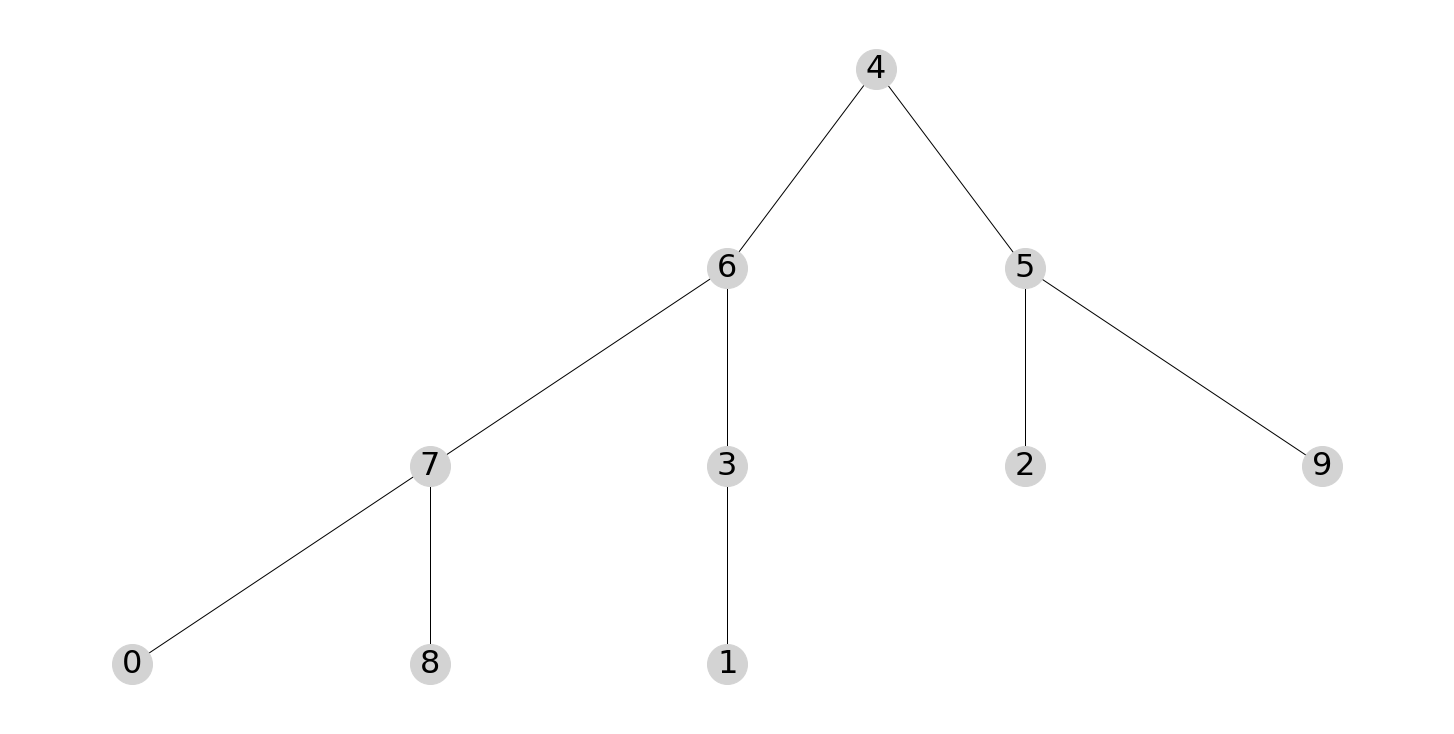

In [64]:
drawtree(L)
L

In [65]:
S = []

In [66]:
S = [L[0]] + S

In [67]:
S

[4]

In [68]:
L[0], L[-1] = L[-1], L[0]

In [69]:
L = L[:-1]
L

[1, 6, 5, 7, 3, 2, 9, 0, 8]

In [70]:
L, S

([1, 6, 5, 7, 3, 2, 9, 0, 8], [4])

In [71]:
L[1], L[3] = L[3], L[1]

[1, 7, 5, 6, 3, 2, 9, 0, 8]

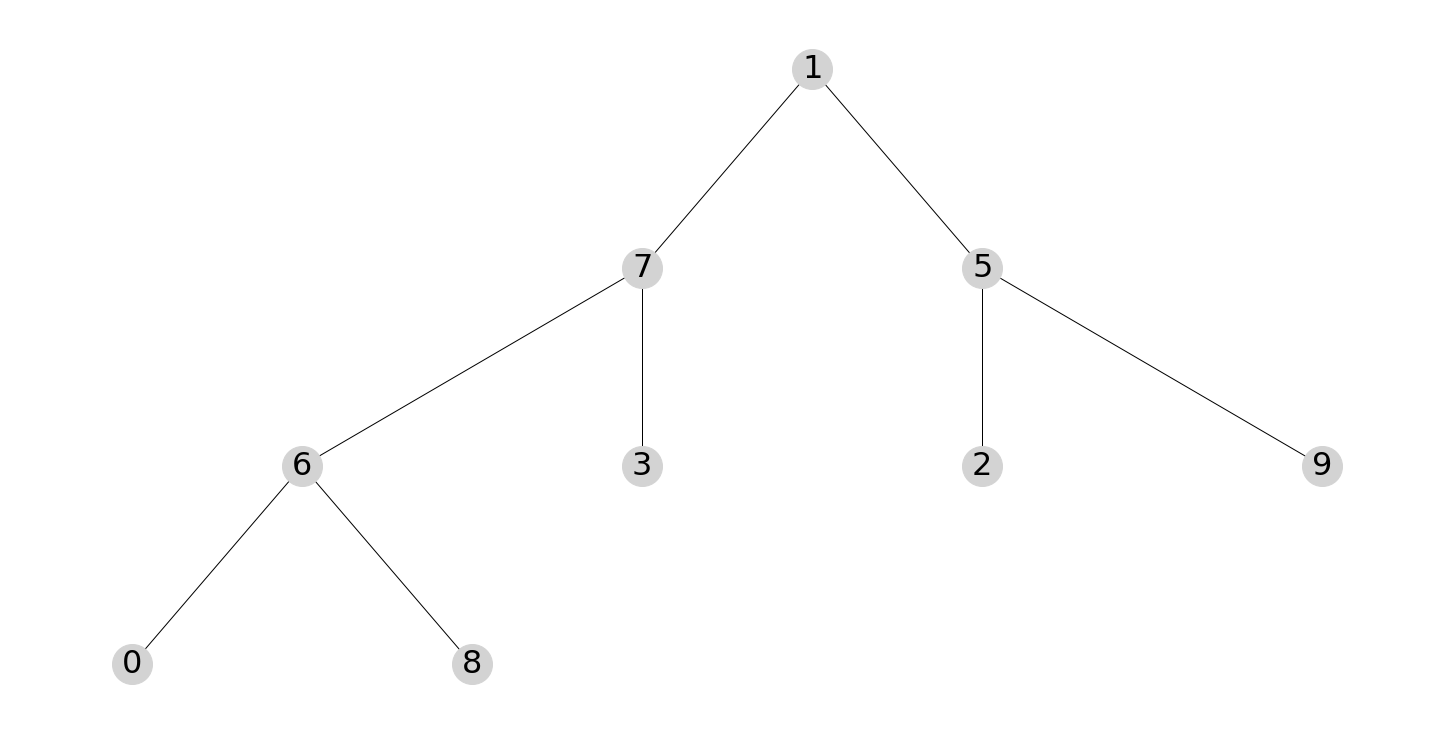

In [72]:
drawtree(L)
L

<br>

## $ \log_b n $

***

$ 2^4 = 2 \times 2 \times 2 \times 2 = 16$

$ 2^{-4} = \frac{1}{2^4}$

$ 2^4 \times 2^{-4} = 2^{4 + (-4)} = 2^{0}$

$ 2^{0.5} = \sqrt{2}$

In [73]:
2**4

16

In [74]:
2**(-4)

0.0625

In [75]:
2**(0.5)

1.4142135623730951

<br>

$ b^a = n \Leftrightarrow \log_b n = a$

$ 2^4 = 16 \Leftrightarrow \log_2 16 = 4$

In [76]:
import math

In [77]:
math.log(2, 2)

1.0

<br>

## Height of a tree

***

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


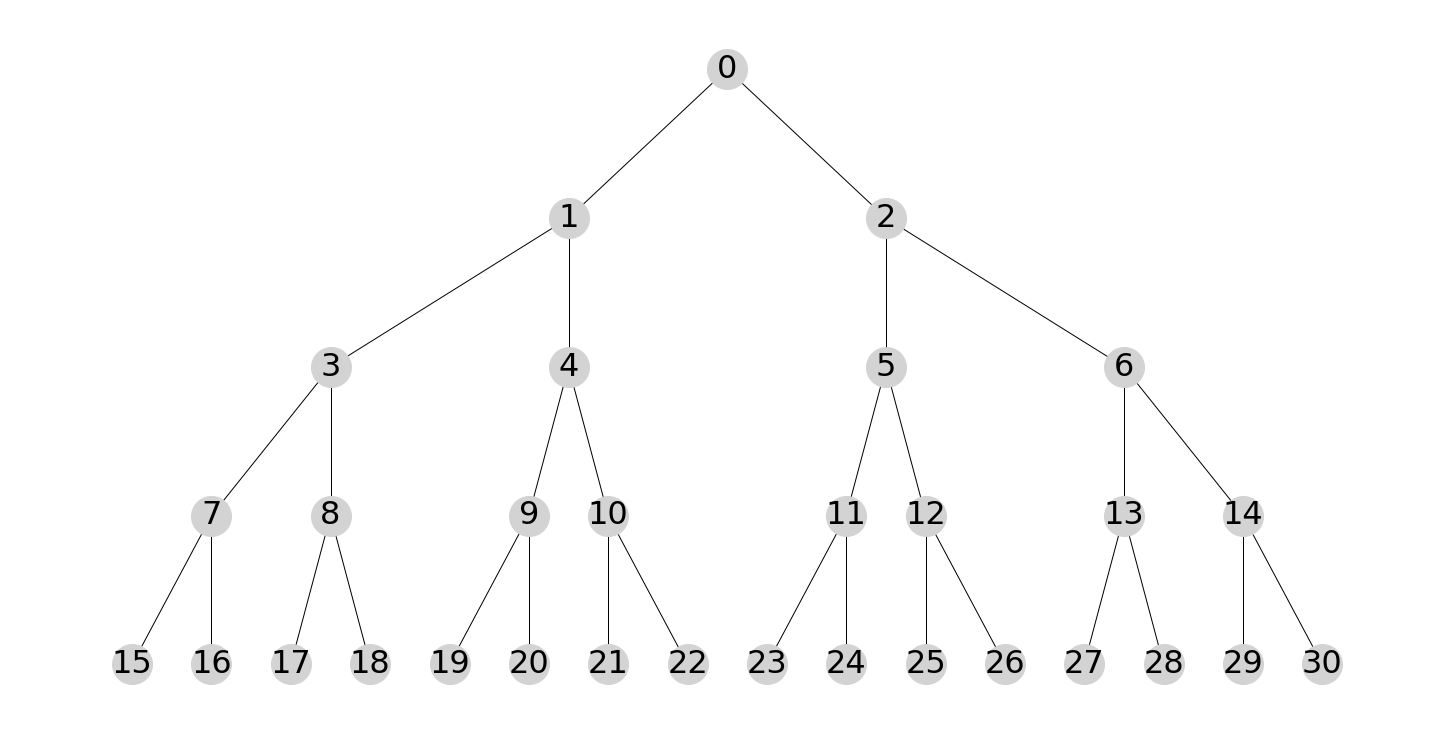

In [78]:
# Length of the list.
n = 31
# Create a list of length n.
L = list(range(n))
# Show the list.
print(L)
# Draw the tree from L.
drawtree(L)

In [79]:
2**0 + 2**1 + 2**2 + 2**3 + 2**4

31

$ 2^{h+1} -1 = \sum_{i=0}^h 2^i$

In [80]:
def max_list_length(height):
    total_nodes = 0
    for i in range(height + 1):
        total_nodes = total_nodes + 2**i
    return total_nodes

In [81]:
max_list_length(4)

31

In [82]:
2**5

32

In [83]:
max_list_length(10)

2047

In [84]:
2**11

2048

In [85]:
0b011111111

255

In [86]:
(1 * 2**7) + (1 * 2**6) + (1 * 2**5) + (1 * 2**4) + (1 * 2**3) + (1 * 2**2) + (1 * 2**1) + (1 * 2**0)

255

In [87]:
0b100000000 - 0b1

255

In [88]:
def max_list_length(height):
    return 2**(height+1) - 1

In [89]:
max_list_length(4)

31

In [90]:
max_list_length(10)

2047

In [91]:
for length in range(32, 0, -1):
    print(f'{length:2}\t {math.log(length, 2):2.3}')

32	 5.0
31	 4.95
30	 4.91
29	 4.86
28	 4.81
27	 4.75
26	 4.7
25	 4.64
24	 4.58
23	 4.52
22	 4.46
21	 4.39
20	 4.32
19	 4.25
18	 4.17
17	 4.09
16	 4.0
15	 3.91
14	 3.81
13	 3.7
12	 3.58
11	 3.46
10	 3.32
 9	 3.17
 8	 3.0
 7	 2.81
 6	 2.58
 5	 2.32
 4	 2.0
 3	 1.58
 2	 1.0
 1	 0.0


<br>

## Big O

***

In [92]:
n = np.arange(0.1, 1000.1, 0.1)

y1 = n**2

y2 = n * np.log(n)

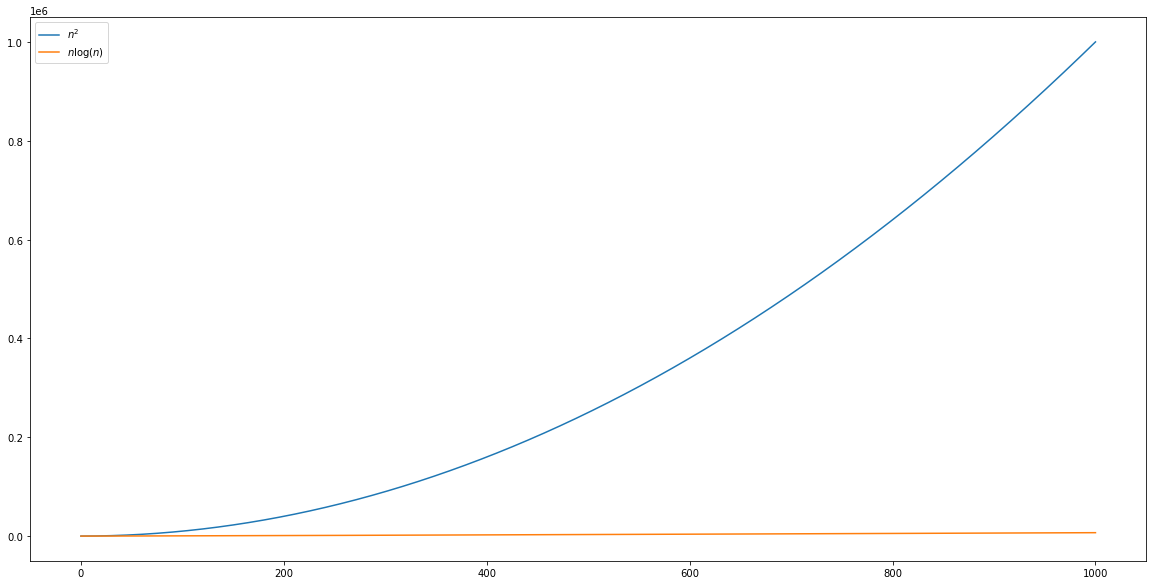

In [93]:
plt.plot(n, y1, label='$n^2$')
plt.plot(n, y2, label='$n \log(n)$')

plt.legend()

**Quick definition**

$ f(n) = n^2 $ is $ O(g(n))$ where $g(n) = n^3$

because

$ f(n) \leq 1 \times $ for all $n >= 1 $

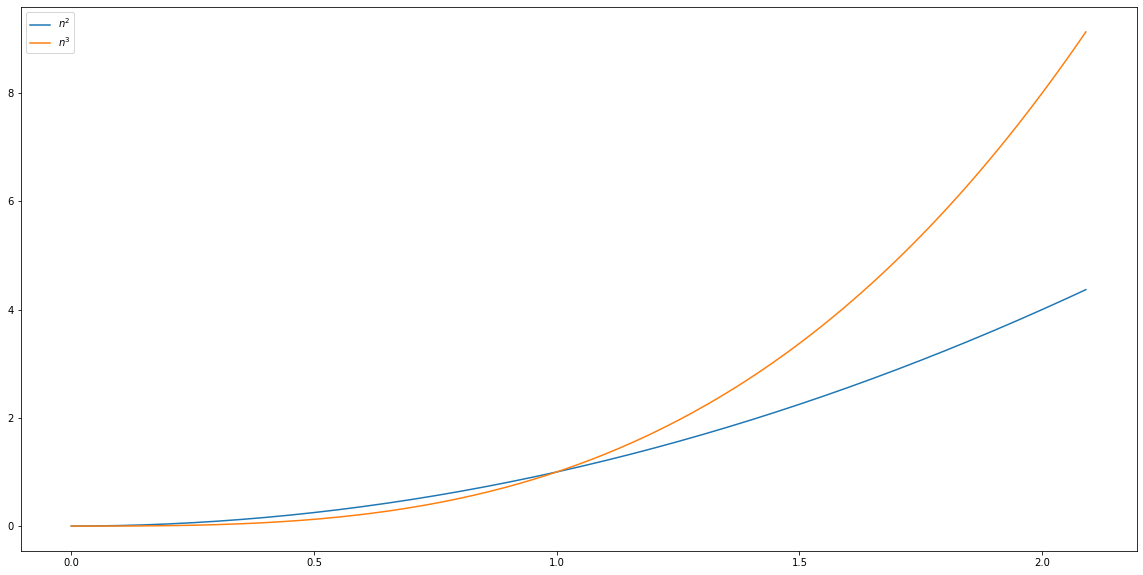

In [94]:
n = np.arange(0.0, 2.1, 0.01)

plt.plot(n, n**2, label='$n^2$')
plt.plot(n, n**3, label='$n^3$')

plt.legend()

Technically, $2n^2$ is $O(n^2)$, even though...

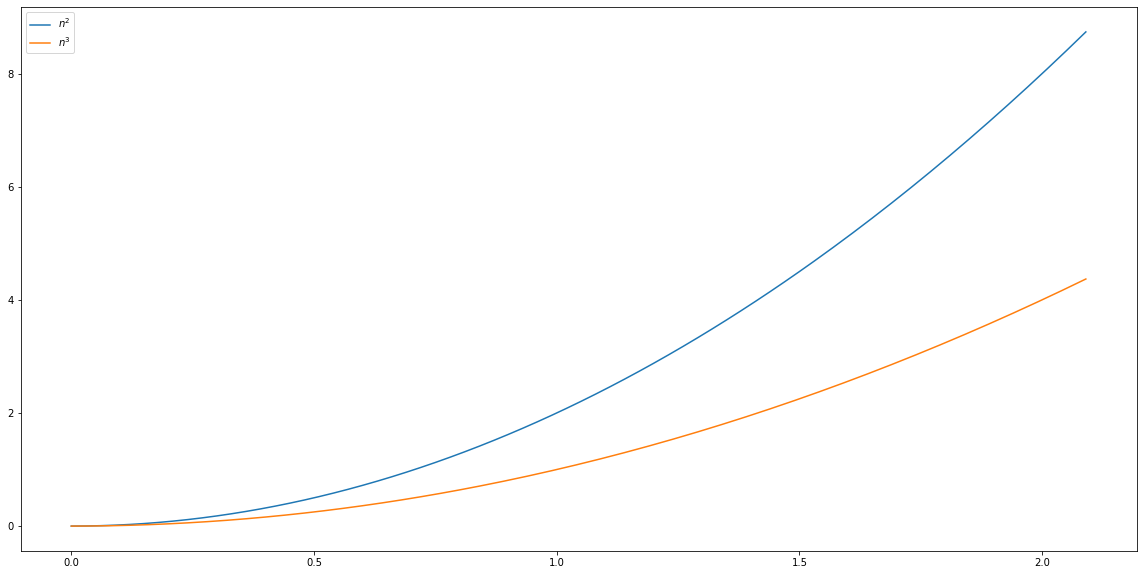

In [95]:
n = np.arange(0.0, 2.1, 0.01)

plt.plot(n, 2.0* (n**2), label='$n^2$')
plt.plot(n, n**2, label='$n^3$')

plt.legend()

$ n \times \log(n) $ + $n \times \log(n) = 2 n \log(n)$

$2 n \log(n)$ is $O( n \log(n))$

<br>

## Extras

***

In [96]:
# int's are passed by value

# Function: b is a value.
def change(b):
    # Change value of b.
    b = 2

# Variable a set to 1
a = 1
    
# a is passed by value.
change(a)

# a has not changed.
print(a)

1


In [97]:
# Lists are passed by reference

# Function: a is a reference.
def change(b):
    # Change an element.
    b[2] = 100
    
# List.
a = [1, 2, 3, 4]
    
# Pass a to change.
change(a)

# a has changed.
print(a)

[1, 2, 100, 4]


***

## End